In [44]:
import glob
import os

import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import seaborn as sns

import scanpy.api as sc

%matplotlib inline

Output of `sourmash gather`

```
 ✘  Fri  3 Aug - 01:05  /mnt/data/genomes/mm10/gencode/m17 
 ubuntu@olgabot-sourmash-juypter  sourmash gather --output A1-D041914-3_8_M-1-1.gencode.vM17.csv --threshold-bp 500 --dna --ksize 21 A1-D041914-3_8_M-1-1.sig gencode.vM17.transcripts.scale1000.k21.dna.sbt
loaded query: A1-D041914-3_8_M-1-1|tissue:Bl... (k=21, DNA)
loaded 1 databases.


overlap     p_query p_match avg_abund
---------   ------- ------- ---------
7.0 kbp        0.3%  100.0%      38.3    ENSMUST00000107094.1|ENSMUSG000000526...
7.0 kbp        0.1%   70.0%       7.6    ENSMUST00000002172.13|ENSMUSG00000002...
7.0 kbp        0.5%    9.0%      78.3    ENSMUST00000226445.1|ENSMUSG000001158...
7.0 kbp        0.1%  100.0%      13.1    ENSMUST00000068795.3|ENSMUSG000000553...
6.0 kbp        0.0%   85.7%       4.5    ENSMUST00000025581.6|ENSMUSG000000246...
6.0 kbp        0.2%   85.7%      33.8    ENSMUST00000028683.13|ENSMUSG00000027...
6.0 kbp        0.1%   66.7%       9.2    ENSMUST00000029445.12|ENSMUSG00000027...
6.0 kbp        0.1%  100.0%       9.3    ENSMUST00000155480.7|ENSMUSG000000764...
6.0 kbp        0.2%   66.7%      33.8    ENSMUST00000020608.2|ENSMUSG000000203...
6.0 kbp        0.0%   66.7%       7.8    ENSMUST00000074733.10|ENSMUSG00000058...
6.0 kbp        0.2%  100.0%      26.0    ENSMUST00000055704.11|ENSMUSG00000032...
6.0 kbp        0.1%  100.0%      18.3    ENSMUST00000030947.3|ENSMUSG000000290...
5.0 kbp        0.0%   35.7%       8.2    ENSMUST00000101339.7|ENSMUSG000000794...
6.0 kbp        0.0%   55.6%       4.4    ENSMUST00000180798.1|ENSMUSG000000976...
5.0 kbp        0.1%   83.3%      10.8    ENSMUST00000193359.5|ENSMUSG000000429...
5.0 kbp        0.0%  100.0%       9.6    ENSMUST00000078079.9|ENSMUSG000000575...
5.0 kbp        0.0%  100.0%       7.0    ENSMUST00000025254.8|ENSMUSG000000243...
5.0 kbp        0.1%  100.0%      13.4    ENSMUST00000028755.7|ENSMUSG000000272...
5.0 kbp        0.1%  100.0%      29.8    ENSMUST00000001566.9|ENSMUSG000000015...
5.0 kbp        0.1%   83.3%      14.8    ENSMUST00000102781.9|ENSMUSG000000285...
5.0 kbp        0.0%   71.4%       7.4    ENSMUST00000061050.5|ENSMUSG000000226...
5.0 kbp        0.1%  100.0%      16.4    ENSMUST00000107619.2|ENSMUSG000000030...
5.0 kbp        0.1%  100.0%      17.2    ENSMUST00000023055.7|ENSMUSG000000224...
5.0 kbp        0.1%   33.3%      21.2    ENSMUST00000171562.7|ENSMUSG000000225...
5.0 kbp        0.0%   71.4%       4.2    ENSMUST00000022610.14|ENSMUSG00000022...
5.0 kbp        0.0%  100.0%       2.8    ENSMUST00000103008.11|ENSMUSG00000028...
5.0 kbp        0.1%   83.3%      12.6    ENSMUST00000117919.7|ENSMUSG000000302...

```

In [4]:
cd /mnt/data/genomes/mm10/gencode/m17/

/mnt/data/genomes/mm10/gencode/m17


In [5]:
gathered = pd.read_csv('A1-D041914-3_8_M-1-1.gencode.vM17.csv')
print(gathered.shape)
gathered.head()

(1818, 11)


,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,name,filename,md5
0,7000,0.000793,1.000000,0.000793,0.002671,38.285714,50.0,20.878658,ENSMUST00000107094.1|ENSMUSG00000052684.4|OTTM...,gencode.vM17.transcripts.scale1000.k21.dna.sbt,bdf56c03f05afa965f40ca28f20a18ef
1,7000,0.000793,0.700000,0.000793,0.000528,7.571429,3.0,8.466019,ENSMUST00000002172.13|ENSMUSG00000002103.15|OT...,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ab56d9401bdb1e4bc9216654297583d6
2,7000,0.000793,0.089744,0.000793,0.005462,78.285714,22.0,144.403912,ENSMUST00000226445.1|ENSMUSG00000115801.1|OTTM...,gencode.vM17.transcripts.scale1000.k21.dna.sbt,3f0a8db328e1902c36f2ca2389be2de2
3,7000,0.000793,1.000000,0.000793,0.000917,13.142857,14.0,3.757985,ENSMUST00000068795.3|ENSMUSG00000055302.5|OTTM...,gencode.vM17.transcripts.scale1000.k21.dna.sbt,3567d2fa27139b01eec811bcb70e74d1
4,6000,0.000680,0.857143,0.000680,0.000269,4.500000,4.0,2.500000,ENSMUST00000025581.6|ENSMUSG00000024678.6|OTTM...,gencode.vM17.transcripts.scale1000.k21.dna.sbt,e16cf8a99e1042284b8b67c54b18b71d


In [12]:
transcript_metadata = gathered.name.str.strip('|').str.split('|', expand=True)
transcript_metadata.columns = ['gencode_transcript_id', 'gencode_gene_id', 'vega_gene_id', 'vega_transcript_id',
                               'alternative_symbol',
                               'gene_symbol', 'transcript_length', 'transcript_type',]
print(transcript_metadata.shape)
transcript_metadata.head()

(1818, 8)


,gencode_transcript_id,gencode_gene_id,vega_gene_id,vega_transcript_id,alternative_symbol,gene_symbol,transcript_length,transcript_type
0,ENSMUST00000107094.1,ENSMUSG00000052684.4,OTTMUSG00000008035.1,OTTMUST00000018173.1,RP23-135A21.5-001,Jun,3189,protein_coding
1,ENSMUST00000002172.13,ENSMUSG00000002103.15,OTTMUSG00000014413.3,OTTMUST00000034159.2,RP23-20F9.7-001,Acp2,4656,protein_coding
2,ENSMUST00000226445.1,ENSMUSG00000115801.1,OTTMUSG00000070529.1,OTTMUST00000170496.1,RP23-48M16.13-001,RP23-48M16.13,93147,lincRNA
3,ENSMUST00000068795.3,ENSMUSG00000055302.5,OTTMUSG00000024873.1,OTTMUST00000061272.1,AC169036.4-001,Mrfap1,1648,protein_coding
4,ENSMUST00000025581.6,ENSMUSG00000024678.6,OTTMUSG00000028272.2,OTTMUST00000070064.2,AC165168.1-001,Ms4a4d,1513,protein_coding


In [17]:
gathered_metadata = pd.concat([gathered, transcript_metadata], axis=1)
new_column_order = ['gene_symbol'] + gathered_metadata.columns.difference(['gene_symbol']).tolist()
gathered_metadata = gathered_metadata[new_column_order]
print(gathered_metadata.shape)
gathered_metadata.head()

(1818, 19)


,gene_symbol,alternative_symbol,average_abund,f_match,f_orig_query,f_unique_to_query,f_unique_weighted,filename,gencode_gene_id,gencode_transcript_id,intersect_bp,md5,median_abund,name,std_abund,transcript_length,transcript_type,vega_gene_id,vega_transcript_id
0,Jun,RP23-135A21.5-001,38.285714,1.000000,0.000793,0.000793,0.002671,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000052684.4,ENSMUST00000107094.1,7000,bdf56c03f05afa965f40ca28f20a18ef,50.0,ENSMUST00000107094.1|ENSMUSG00000052684.4|OTTM...,20.878658,3189,protein_coding,OTTMUSG00000008035.1,OTTMUST00000018173.1
1,Acp2,RP23-20F9.7-001,7.571429,0.700000,0.000793,0.000793,0.000528,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000002103.15,ENSMUST00000002172.13,7000,ab56d9401bdb1e4bc9216654297583d6,3.0,ENSMUST00000002172.13|ENSMUSG00000002103.15|OT...,8.466019,4656,protein_coding,OTTMUSG00000014413.3,OTTMUST00000034159.2
2,RP23-48M16.13,RP23-48M16.13-001,78.285714,0.089744,0.000793,0.000793,0.005462,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000115801.1,ENSMUST00000226445.1,7000,3f0a8db328e1902c36f2ca2389be2de2,22.0,ENSMUST00000226445.1|ENSMUSG00000115801.1|OTTM...,144.403912,93147,lincRNA,OTTMUSG00000070529.1,OTTMUST00000170496.1
3,Mrfap1,AC169036.4-001,13.142857,1.000000,0.000793,0.000793,0.000917,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000055302.5,ENSMUST00000068795.3,7000,3567d2fa27139b01eec811bcb70e74d1,14.0,ENSMUST00000068795.3|ENSMUSG00000055302.5|OTTM...,3.757985,1648,protein_coding,OTTMUSG00000024873.1,OTTMUST00000061272.1
4,Ms4a4d,AC165168.1-001,4.500000,0.857143,0.000680,0.000680,0.000269,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000024678.6,ENSMUST00000025581.6,6000,e16cf8a99e1042284b8b67c54b18b71d,4.0,ENSMUST00000025581.6|ENSMUSG00000024678.6|OTTM...,2.500000,1513,protein_coding,OTTMUSG00000028272.2,OTTMUST00000070064.2


In [19]:
gathered_metadata.sort_values('average_abund', ascending=False)

,gene_symbol,alternative_symbol,average_abund,f_match,f_orig_query,f_unique_to_query,f_unique_weighted,filename,gencode_gene_id,gencode_transcript_id,intersect_bp,md5,median_abund,name,std_abund,transcript_length,transcript_type,vega_gene_id,vega_transcript_id
357,Yam1,RP23-81C12.4-001,3669.000000,1.000000,0.000227,0.000227,0.073137,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000105361.1,ENSMUST00000200021.1,2000,2da5928fd99a91bce918c894fc0bb030,3669.0,ENSMUST00000200021.1|ENSMUSG00000105361.1|OTTM...,339.000000,923,lincRNA,OTTMUSG00000043057.2,OTTMUST00000113000.2
459,RP24-68H1.1,RP24-68H1.1-002,3269.000000,1.000000,0.000227,0.000227,0.065164,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000044285.8,ENSMUST00000227415.1,2000,8ee2a25cb5ab367bdf62c11762fb1025,3269.0,ENSMUST00000227415.1|ENSMUSG00000044285.8|OTTM...,2776.000000,750,processed_transcript,OTTMUSG00000019532.2,OTTMUST00000168180.1
85,Dcn,RP24-325N16.1-002,1200.250000,1.000000,0.000453,0.000453,0.047851,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000019929.16,ENSMUST00000163448.3,4000,0b1a04d38108ba5b35990bb0af48f3bd,1141.5,ENSMUST00000163448.3|ENSMUSG00000019929.16|OTT...,969.121348,1758,protein_coding,OTTMUSG00000064847.1,OTTMUST00000157931.1
423,Ftl1,AC151602.3-003,981.500000,0.666667,0.000227,0.000227,0.019565,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000050708.16,ENSMUST00000211500.1,2000,721acbc574704461f20566c752dffbcd,981.5,ENSMUST00000211500.1|ENSMUSG00000050708.16|OTT...,117.500000,825,retained_intron,OTTMUSG00000022565.3,OTTMUST00000054060.1
506,Fos,RP24-309L4.1-001,659.500000,1.000000,0.000227,0.000227,0.013146,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000021250.13,ENSMUST00000021674.6,2000,2ada3f2b8a0ac22b6e65d1c7c293acd7,659.5,ENSMUST00000021674.6|ENSMUSG00000021250.13|OTT...,156.500000,2108,protein_coding,OTTMUSG00000019764.1,OTTMUST00000047265.1
637,Igfbp7,RP24-439P5.2-002,659.000000,1.000000,0.000227,0.000227,0.013136,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000036256.13,ENSMUST00000163898.5,2000,61ee00fc9c0dd5ac4c1e55a842a14ad8,659.0,ENSMUST00000163898.5|ENSMUSG00000036256.13|OTT...,143.000000,1200,protein_coding,OTTMUSG00000056133.1,OTTMUST00000138802.1
1103,Ly6a,RP23-458B6.1-003,392.000000,1.000000,0.000113,0.000113,0.003907,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000075602.10,ENSMUST00000187171.1,1000,285eda457551bd31051af672bbfd2df4,392.0,ENSMUST00000187171.1|ENSMUSG00000075602.10|OTT...,0.000000,853,protein_coding,OTTMUSG00000045110.7,OTTMUST00000118548.2
102,mt-Cytb,mt-Cytb-201,352.750000,1.000000,0.000453,0.000453,0.014063,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000064370.1,ENSMUST00000082421.1,4000,51d076000ef108d8713b7862172dca68,379.5,ENSMUST00000082421.1|ENSMUSG00000064370.1|-|-|...,63.302350,1144,protein_coding,-,-
625,Cck,RP23-241P13.3-001,313.500000,1.000000,0.000227,0.000227,0.006249,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000032532.7,ENSMUST00000035120.5,2000,14846e45a4f6a30d288b0a253ef3a34d,313.5,ENSMUST00000035120.5|ENSMUSG00000032532.7|OTTM...,21.500000,691,protein_coding,OTTMUSG00000062636.2,OTTMUST00000152587.1
573,Rap2b,RP23-390C13.2-001,312.500000,0.181818,0.000227,0.000227,0.006229,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000036894.3,ENSMUST00000049064.3,2000,38a679415ff02b2ce011d0dd362e40a3,312.5,ENSMUST00000049064.3|ENSMUSG00000036894.3|OTTM...,306.500000,6793,protein_coding,OTTMUSG00000051923.1,OTTMUST00000130706.1


In [20]:
import scanpy

results_file = '/mnt/data/tabula-muris-facs.h5ad'


tm_facs_metadata = pd.read_csv('/mnt/data/czbiohub-tabula-muris/TM_facs_metadata.csv')
tm_facs_metadata = tm_facs_metadata.set_index('cell')

# Replace dots with dashes
index = tm_facs_metadata.index.str.replace('.', '-')
tm_facs_metadata.index = index

tm_facs_data = scanpy.anndata.read_h5ad('/mnt/data/czbiohub-tabula-muris/TM_facs_mat.h5ad')

tm_facs_data.obs.index = index

In [21]:
bladder_cell = tm_facs_data['A1-D041914-3_8_M-1-1', :]
bladder_cell

View of AnnData object with n_obs × n_vars = 1 × 23433 

In [34]:
top10_genes = list(np.argsort(bladder_cell.X)[-10:])
top10_genes

[8028, 2363, 10726, 19844, 8030, 12626, 12266, 7928, 6045, 18075]

In [35]:
bladder_cell.var.index[top10_genes]

Index(['Fth1', 'Actb', 'Igfbp7', 'Sparc', 'Ftl1', 'Mgp', 'Malat1', 'Fos',
       'Dcn', 'Rn45s'],
      dtype='object', name='index')

In [38]:
bladder_cell.X[top10_genes]

ArrayView([ 2822.,  2959.,  3867.,  4392.,  4824.,  6624.,  7665., 10652.,
           18652., 80850.], dtype=float32)

In [40]:
facs_expression = pd.Series(bladder_cell.X, index=bladder_cell.var.index, name='facs_gene_counts')
facs_expression.head()

index
0610005C13Rik      0.0
0610007C21Rik    190.0
0610007L01Rik      0.0
0610007N19Rik     10.0
0610007P08Rik      4.0
Name: facs_gene_counts, dtype: float32

In [64]:
gathered_metadata_facs = gathered_metadata.join(facs_expression, on='gene_symbol')
# gathered_metadata_facs['facs_gene_counts'] = gathered_metadata_facs.facs_gene_counts.fillna(-1)
print(gathered_metadata_facs.shape)
gathered_metadata_facs = gathered_metadata_facs.sort_values('average_abund', ascending=False)
gathered_metadata_facs['average_abund_log10'] = np.log10(gathered_metadata_facs.average_abund + 1)
gathered_metadata_facs['facs_gene_counts_log10'] = np.log10(gathered_metadata_facs.facs_gene_counts + 1)
gathered_metadata_facs.head()

(1818, 20)


,gene_symbol,alternative_symbol,average_abund,f_match,f_orig_query,f_unique_to_query,f_unique_weighted,filename,gencode_gene_id,gencode_transcript_id,...,median_abund,name,std_abund,transcript_length,transcript_type,vega_gene_id,vega_transcript_id,facs_gene_counts,average_abund_log10,facs_gene_counts_log10
357,Yam1,RP23-81C12.4-001,3669.00,1.000000,0.000227,0.000227,0.073137,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000105361.1,ENSMUST00000200021.1,...,3669.0,ENSMUST00000200021.1|ENSMUSG00000105361.1|OTTM...,339.000000,923,lincRNA,OTTMUSG00000043057.2,OTTMUST00000113000.2,NaN,3.564666,NaN
459,RP24-68H1.1,RP24-68H1.1-002,3269.00,1.000000,0.000227,0.000227,0.065164,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000044285.8,ENSMUST00000227415.1,...,3269.0,ENSMUST00000227415.1|ENSMUSG00000044285.8|OTTM...,2776.000000,750,processed_transcript,OTTMUSG00000019532.2,OTTMUST00000168180.1,NaN,3.514548,NaN
85,Dcn,RP24-325N16.1-002,1200.25,1.000000,0.000453,0.000453,0.047851,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000019929.16,ENSMUST00000163448.3,...,1141.5,ENSMUST00000163448.3|ENSMUSG00000019929.16|OTT...,969.121348,1758,protein_coding,OTTMUSG00000064847.1,OTTMUST00000157931.1,18652.0,3.079633,4.270749
423,Ftl1,AC151602.3-003,981.50,0.666667,0.000227,0.000227,0.019565,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000050708.16,ENSMUST00000211500.1,...,981.5,ENSMUST00000211500.1|ENSMUSG00000050708.16|OTT...,117.500000,825,retained_intron,OTTMUSG00000022565.3,OTTMUST00000054060.1,4824.0,2.992333,3.683497
506,Fos,RP24-309L4.1-001,659.50,1.000000,0.000227,0.000227,0.013146,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000021250.13,ENSMUST00000021674.6,...,659.5,ENSMUST00000021674.6|ENSMUSG00000021250.13|OTT...,156.500000,2108,protein_coding,OTTMUSG00000019764.1,OTTMUST00000047265.1,10652.0,2.819873,4.027472


In [56]:
from scipy import stats

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


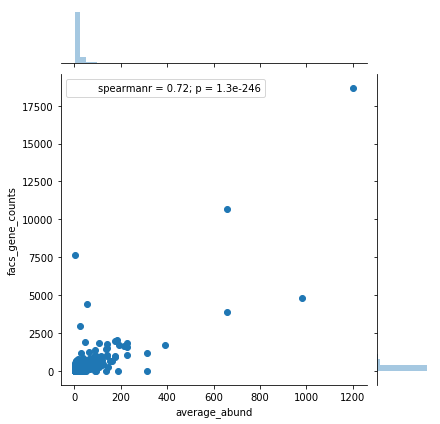

In [65]:
sns.jointplot('average_abund', 'facs_gene_counts', gathered_metadata_facs, stat_func=stats.spearmanr)


/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


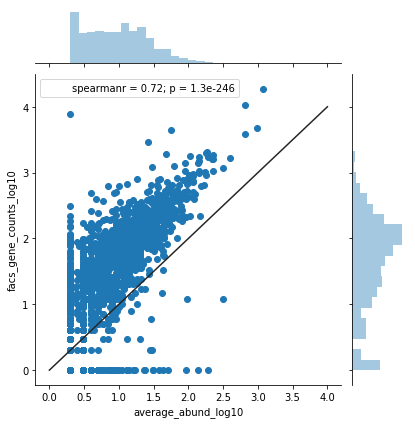

In [175]:
g = sns.jointplot('average_abund_log10', 'facs_gene_counts_log10', gathered_metadata_facs, stat_func=stats.spearmanr)
g.ax_joint.plot([0, 4], [0, 4], color='#262626')

In [67]:
gathered_metadata_facs.head(20)

,gene_symbol,alternative_symbol,average_abund,f_match,f_orig_query,f_unique_to_query,f_unique_weighted,filename,gencode_gene_id,gencode_transcript_id,...,median_abund,name,std_abund,transcript_length,transcript_type,vega_gene_id,vega_transcript_id,facs_gene_counts,average_abund_log10,facs_gene_counts_log10
357,Yam1,RP23-81C12.4-001,3669.00,1.000000,0.000227,0.000227,0.073137,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000105361.1,ENSMUST00000200021.1,...,3669.0,ENSMUST00000200021.1|ENSMUSG00000105361.1|OTTM...,339.000000,923,lincRNA,OTTMUSG00000043057.2,OTTMUST00000113000.2,NaN,3.564666,NaN
459,RP24-68H1.1,RP24-68H1.1-002,3269.00,1.000000,0.000227,0.000227,0.065164,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000044285.8,ENSMUST00000227415.1,...,3269.0,ENSMUST00000227415.1|ENSMUSG00000044285.8|OTTM...,2776.000000,750,processed_transcript,OTTMUSG00000019532.2,OTTMUST00000168180.1,NaN,3.514548,NaN
85,Dcn,RP24-325N16.1-002,1200.25,1.000000,0.000453,0.000453,0.047851,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000019929.16,ENSMUST00000163448.3,...,1141.5,ENSMUST00000163448.3|ENSMUSG00000019929.16|OTT...,969.121348,1758,protein_coding,OTTMUSG00000064847.1,OTTMUST00000157931.1,18652.0,3.079633,4.270749
423,Ftl1,AC151602.3-003,981.50,0.666667,0.000227,0.000227,0.019565,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000050708.16,ENSMUST00000211500.1,...,981.5,ENSMUST00000211500.1|ENSMUSG00000050708.16|OTT...,117.500000,825,retained_intron,OTTMUSG00000022565.3,OTTMUST00000054060.1,4824.0,2.992333,3.683497
506,Fos,RP24-309L4.1-001,659.50,1.000000,0.000227,0.000227,0.013146,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000021250.13,ENSMUST00000021674.6,...,659.5,ENSMUST00000021674.6|ENSMUSG00000021250.13|OTT...,156.500000,2108,protein_coding,OTTMUSG00000019764.1,OTTMUST00000047265.1,10652.0,2.819873,4.027472
637,Igfbp7,RP24-439P5.2-002,659.00,1.000000,0.000227,0.000227,0.013136,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000036256.13,ENSMUST00000163898.5,...,659.0,ENSMUST00000163898.5|ENSMUSG00000036256.13|OTT...,143.000000,1200,protein_coding,OTTMUSG00000056133.1,OTTMUST00000138802.1,3867.0,2.819544,3.587487
1103,Ly6a,RP23-458B6.1-003,392.00,1.000000,0.000113,0.000113,0.003907,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000075602.10,ENSMUST00000187171.1,...,392.0,ENSMUST00000187171.1|ENSMUSG00000075602.10|OTT...,0.000000,853,protein_coding,OTTMUSG00000045110.7,OTTMUST00000118548.2,1684.0,2.594393,3.226600
102,mt-Cytb,mt-Cytb-201,352.75,1.000000,0.000453,0.000453,0.014063,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000064370.1,ENSMUST00000082421.1,...,379.5,ENSMUST00000082421.1|ENSMUSG00000064370.1|-|-|...,63.302350,1144,protein_coding,-,-,NaN,2.548696,NaN
625,Cck,RP23-241P13.3-001,313.50,1.000000,0.000227,0.000227,0.006249,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000032532.7,ENSMUST00000035120.5,...,313.5,ENSMUST00000035120.5|ENSMUSG00000032532.7|OTTM...,21.500000,691,protein_coding,OTTMUSG00000062636.2,OTTMUST00000152587.1,1169.0,2.497621,3.068186
573,Rap2b,RP23-390C13.2-001,312.50,0.181818,0.000227,0.000227,0.006229,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000036894.3,ENSMUST00000049064.3,...,312.5,ENSMUST00000049064.3|ENSMUSG00000036894.3|OTTM...,306.500000,6793,protein_coding,OTTMUSG00000051923.1,OTTMUST00000130706.1,11.0,2.496238,1.079181


In [68]:
gathered_metadata_facs.query('(average_abund_log10 > 2.4) & (facs_gene_counts_log10 < 1.1)')

,gene_symbol,alternative_symbol,average_abund,f_match,f_orig_query,f_unique_to_query,f_unique_weighted,filename,gencode_gene_id,gencode_transcript_id,...,median_abund,name,std_abund,transcript_length,transcript_type,vega_gene_id,vega_transcript_id,facs_gene_counts,average_abund_log10,facs_gene_counts_log10
573,Rap2b,RP23-390C13.2-001,312.5,0.181818,0.000227,0.000227,0.006229,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000036894.3,ENSMUST00000049064.3,...,312.5,ENSMUST00000049064.3|ENSMUSG00000036894.3|OTTM...,306.5,6793,protein_coding,OTTMUSG00000051923.1,OTTMUST00000130706.1,11.0,2.496238,1.079181


In [69]:
gathered_metadata_facs.query('(average_abund_log10 < 0.5) & (facs_gene_counts_log10 > 3)')

,gene_symbol,alternative_symbol,average_abund,f_match,f_orig_query,f_unique_to_query,f_unique_weighted,filename,gencode_gene_id,gencode_transcript_id,...,median_abund,name,std_abund,transcript_length,transcript_type,vega_gene_id,vega_transcript_id,facs_gene_counts,average_abund_log10,facs_gene_counts_log10
834,Malat1,RP24-458F14.2-001,1.0,0.25,0.000113,0.000113,0.00001,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000092341.2,ENSMUST00000172812.2,...,1.0,ENSMUST00000172812.2|ENSMUSG00000092341.2|OTTM...,0.0,6983,lincRNA,OTTMUSG00000037798.2,OTTMUST00000097547.2,7665.0,0.30103,3.884569


In [70]:
len('attgtgtgtgtgtgtgtgtatgagtgtaagtatAGCtttttttttttttt')

50

In [89]:
isoforms = gathered_metadata_facs.groupby('gene_symbol').filter(lambda x: len(x) > 1)
print(isoforms.shape)
isoforms.head()

(44, 22)


,gene_symbol,alternative_symbol,average_abund,f_match,f_orig_query,f_unique_to_query,f_unique_weighted,filename,gencode_gene_id,gencode_transcript_id,...,median_abund,name,std_abund,transcript_length,transcript_type,vega_gene_id,vega_transcript_id,facs_gene_counts,average_abund_log10,facs_gene_counts_log10
827,Batf2,AC131114.1-005,45.0,1.000000,0.000113,0.000113,0.000449,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000039699.13,ENSMUST00000141858.1,...,45.0,ENSMUST00000141858.1|ENSMUSG00000039699.13|OTT...,0.0,722,retained_intron,OTTMUSG00000018629.1,OTTMUST00000044871.1,128.0,1.662758,2.110590
1678,Pml,RP24-67M24.1-003,41.0,1.000000,0.000113,0.000113,0.000409,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000036986.16,ENSMUST00000153820.7,...,41.0,ENSMUST00000153820.7|ENSMUSG00000036986.16|OTT...,0.0,2652,protein_coding,OTTMUSG00000033332.2,OTTMUST00000083651.1,14.0,1.623249,1.176091
1072,Fbln1,AL583891.1-002,39.0,0.500000,0.000227,0.000113,0.000389,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000006369.14,ENSMUST00000109432.3,...,39.0,ENSMUST00000109432.3|ENSMUSG00000006369.14|OTT...,0.0,2273,protein_coding,OTTMUSG00000030663.2,OTTMUST00000075913.1,353.0,1.602060,2.549003
439,Dnaja1,Dnaja1-210,34.0,0.250000,0.000227,0.000227,0.000678,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000028410.13,ENSMUST00000164233.7,...,34.0,ENSMUST00000164233.7|ENSMUSG00000028410.13|OTT...,31.0,5622,protein_coding,OTTMUSG00000006566.2,-,81.0,1.544068,1.913814
1179,Supt5,RP23-89A16.2-004,29.0,0.333333,0.000113,0.000113,0.000289,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000003435.9,ENSMUST00000209141.1,...,29.0,ENSMUST00000209141.1|ENSMUSG00000003435.9|OTTM...,0.0,3755,protein_coding,OTTMUSG00000059053.1,OTTMUST00000144875.1,NaN,1.477121,NaN


/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


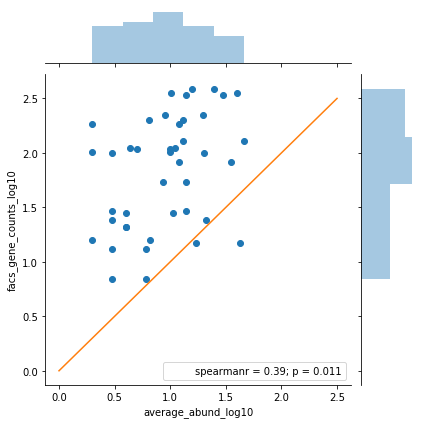

In [97]:
g = sns.jointplot('average_abund_log10', 'facs_gene_counts_log10', isoforms, stat_func=stats.spearmanr)
g.ax_joint.plot([0, 2.5], [0, 2.5])

In [91]:
isoform_counts = isoforms.groupby('gene_symbol')['average_abund'].sum()
print(isoform_counts.shape)
isoform_counts

(22,)


gene_symbol
Acbd3      17.500000
Axl        12.000000
Batf2      57.000000
Dnaja1     45.000000
Fbln1      48.250000
Gls        15.000000
Hnrnpu      7.000000
Jak1       38.800000
Kdm6b      20.666667
Lmna       26.666667
Morf4l2    13.000000
Nedd4      42.000000
Pml        57.000000
Ppp6c       6.000000
Ptges      22.000000
Sbno2       7.000000
Sf3b1      13.333333
Slbp        6.600000
Supt5      30.000000
Top1       21.000000
Tra2b      10.000000
Zbtb20     12.500000
Name: average_abund, dtype: float64

In [92]:
isoforms = isoforms.join(isoform_counts, on='gene_symbol', rsuffix='_summed')
isoforms['average_abund_summed_log10'] = np.log10(isoforms['average_abund_summed'] + 1)
isoforms.head()

,gene_symbol,alternative_symbol,average_abund,f_match,f_orig_query,f_unique_to_query,f_unique_weighted,filename,gencode_gene_id,gencode_transcript_id,...,std_abund,transcript_length,transcript_type,vega_gene_id,vega_transcript_id,facs_gene_counts,average_abund_log10,facs_gene_counts_log10,average_abund_summed,average_abund_summed_log10
827,Batf2,AC131114.1-005,45.0,1.000000,0.000113,0.000113,0.000449,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000039699.13,ENSMUST00000141858.1,...,0.0,722,retained_intron,OTTMUSG00000018629.1,OTTMUST00000044871.1,128.0,1.662758,2.110590,57.00,1.763428
1678,Pml,RP24-67M24.1-003,41.0,1.000000,0.000113,0.000113,0.000409,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000036986.16,ENSMUST00000153820.7,...,0.0,2652,protein_coding,OTTMUSG00000033332.2,OTTMUST00000083651.1,14.0,1.623249,1.176091,57.00,1.763428
1072,Fbln1,AL583891.1-002,39.0,0.500000,0.000227,0.000113,0.000389,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000006369.14,ENSMUST00000109432.3,...,0.0,2273,protein_coding,OTTMUSG00000030663.2,OTTMUST00000075913.1,353.0,1.602060,2.549003,48.25,1.692406
439,Dnaja1,Dnaja1-210,34.0,0.250000,0.000227,0.000227,0.000678,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000028410.13,ENSMUST00000164233.7,...,31.0,5622,protein_coding,OTTMUSG00000006566.2,-,81.0,1.544068,1.913814,45.00,1.662758
1179,Supt5,RP23-89A16.2-004,29.0,0.333333,0.000113,0.000113,0.000289,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000003435.9,ENSMUST00000209141.1,...,0.0,3755,protein_coding,OTTMUSG00000059053.1,OTTMUST00000144875.1,NaN,1.477121,NaN,30.00,1.491362


In [93]:
isoforms.columns

Index(['gene_symbol', 'alternative_symbol', 'average_abund', 'f_match',
       'f_orig_query', 'f_unique_to_query', 'f_unique_weighted', 'filename',
       'gencode_gene_id', 'gencode_transcript_id', 'intersect_bp', 'md5',
       'median_abund', 'name', 'std_abund', 'transcript_length',
       'transcript_type', 'vega_gene_id', 'vega_transcript_id',
       'facs_gene_counts', 'average_abund_log10', 'facs_gene_counts_log10',
       'average_abund_summed', 'average_abund_summed_log10'],
      dtype='object')

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


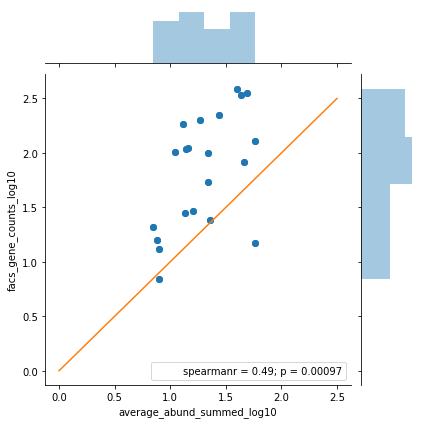

In [98]:
g = sns.jointplot('average_abund_summed_log10', 'facs_gene_counts_log10', isoforms, stat_func=stats.spearmanr)
g.ax_joint.plot([0, 2.5], [0, 2.5])

In [99]:

isoforms.query('facs_gene_counts_log10 > 2.5')

,gene_symbol,alternative_symbol,average_abund,f_match,f_orig_query,f_unique_to_query,f_unique_weighted,filename,gencode_gene_id,gencode_transcript_id,...,std_abund,transcript_length,transcript_type,vega_gene_id,vega_transcript_id,facs_gene_counts,average_abund_log10,facs_gene_counts_log10,average_abund_summed,average_abund_summed_log10
1072,Fbln1,AL583891.1-002,39.00,0.500000,0.000227,0.000113,0.000389,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000006369.14,ENSMUST00000109432.3,...,0.000000,2273,protein_coding,OTTMUSG00000030663.2,OTTMUST00000075913.1,353.0,1.602060,2.549003,48.25,1.692406
1658,Nedd4,RP23-296I6.6-001,29.00,0.166667,0.000113,0.000113,0.000289,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000032216.14,ENSMUST00000034740.14,...,0.000000,5499,protein_coding,OTTMUSG00000044728.16,OTTMUST00000117592.17,340.0,1.477121,2.532754,42.00,1.633468
1001,Jak1,RP23-336G7.2-002,24.00,0.250000,0.000113,0.000113,0.000239,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000028530.14,ENSMUST00000147211.1,...,0.000000,2039,processed_transcript,OTTMUSG00000008208.2,OTTMUST00000018650.1,382.0,1.397940,2.583199,38.80,1.599883
19,Jak1,RP23-336G7.2-001,14.80,0.833333,0.000566,0.000566,0.000738,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000028530.14,ENSMUST00000102781.9,...,7.359348,4906,protein_coding,OTTMUSG00000008208.2,OTTMUST00000018649.1,382.0,1.198657,2.583199,38.80,1.599883
646,Nedd4,RP23-296I6.6-005,13.00,0.666667,0.000227,0.000227,0.000259,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000032216.14,ENSMUST00000184450.7,...,3.000000,3329,protein_coding,OTTMUSG00000044728.16,OTTMUST00000117601.1,340.0,1.146128,2.532754,42.00,1.633468
58,Fbln1,AL583891.1-001,9.25,1.000000,0.000453,0.000453,0.000369,gencode.vM17.transcripts.scale1000.k21.dna.sbt,ENSMUSG00000006369.14,ENSMUST00000057410.13,...,3.897114,3659,protein_coding,OTTMUSG00000030663.2,OTTMUST00000075912.2,353.0,1.010724,2.549003,48.25,1.692406


In [101]:
isoforms.groupby('gene_symbol').size()

gene_symbol
Acbd3      2
Axl        2
Batf2      2
Dnaja1     2
Fbln1      2
Gls        2
Hnrnpu     2
Jak1       2
Kdm6b      2
Lmna       2
Morf4l2    2
Nedd4      2
Pml        2
Ppp6c      2
Ptges      2
Sbno2      2
Sf3b1      2
Slbp       2
Supt5      2
Top1       2
Tra2b      2
Zbtb20     2
dtype: int64

In [173]:
isoform_difference = isoforms.groupby('gene_symbol')['average_abund'].apply(lambda x: np.abs(np.diff(x)[0]))
isoform_difference.sort_values()

gene_symbol
Ppp6c       0.000000
Sbno2       3.000000
Hnrnpu      3.000000
Slbp        4.600000
Morf4l2     5.000000
Kdm6b       5.333333
Acbd3       6.500000
Zbtb20      6.500000
Sf3b1       6.666667
Tra2b       8.000000
Jak1        9.200000
Axl        10.000000
Lmna       10.666667
Gls        11.000000
Nedd4      16.000000
Top1       17.000000
Ptges      18.000000
Dnaja1     23.000000
Pml        25.000000
Supt5      28.000000
Fbln1      29.750000
Batf2      33.000000
Name: average_abund, dtype: float64

In [174]:
isoform_difference

gene_symbol
Acbd3       6.500000
Axl        10.000000
Batf2      33.000000
Dnaja1     23.000000
Fbln1      29.750000
Gls        11.000000
Hnrnpu      3.000000
Jak1        9.200000
Kdm6b       5.333333
Lmna       10.666667
Morf4l2     5.000000
Nedd4      16.000000
Pml        25.000000
Ppp6c       0.000000
Ptges      18.000000
Sbno2       3.000000
Sf3b1       6.666667
Slbp        4.600000
Supt5      28.000000
Top1       17.000000
Tra2b       8.000000
Zbtb20      6.500000
Name: average_abund, dtype: float64